In [4]:
#Importing data manupulation libraries
import numpy as np
import pandas as pd
# importing data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing warings
import warnings
warnings.filterwarnings('ignore')
#importimg log
import logging
logging.basicConfig(filename='model.log',force=True,
                   level=logging.INFO,
                   format='%(asctime)s %(levelname)s %(message)s',
                   filemode='w')
#importing scikit learn libraries
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score                

In [5]:
url=('https://raw.githubusercontent.com/harshthorve284/Life_Expectancy_Model/refs/heads/main/Life%20Expectancy%20Data.csv')
df=pd.read_csv(url)
df.sample(frac=1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2469,Sudan,2003,Developing,59.6,278.0,69,1.74,35.352647,NaN,4381,...,69.0,3.18,69.0,0.2,477.738478,29435944.0,NaN,NaN,0.409,5.6
2853,Vanuatu,2004,Developing,69.6,169.0,0,0.85,334.167337,63.0,0,...,67.0,4.12,69.0,0.1,1787.947230,24143.0,1.6,1.5,0.000,10.7
2600,The former Yugoslav republic of Macedonia,2000,Developing,72.6,125.0,0,2.86,0.000000,NaN,36,...,96.0,8.52,95.0,0.1,NaN,NaN,2.8,2.8,0.000,11.7
2750,United Arab Emirates,2011,Developing,76.3,81.0,1,1.73,387.774991,95.0,0,...,95.0,3.70,95.0,0.1,4462.312900,NaN,5.1,4.9,0.824,13.3
2566,Tajikistan,2002,Developing,64.3,193.0,12,0.60,10.681475,39.0,927,...,84.0,4.48,85.0,0.3,189.387852,6447688.0,4.0,4.0,0.543,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,Kazakhstan,2005,Developing,64.6,294.0,8,6.94,351.860327,94.0,16118,...,99.0,4.70,98.0,0.1,3771.278957,1514729.0,2.4,2.5,0.737,13.9
85,Argentina,2010,Developing,75.5,121.0,10,8.15,187.610955,94.0,17,...,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
1570,Malawi,2015,Developing,58.3,365.0,26,NaN,0.000000,88.0,0,...,88.0,NaN,88.0,4.8,362.657544,1757367.0,6.4,6.2,0.473,10.8
1332,Jordan,2013,Developing,73.9,114.0,4,0.40,546.623516,98.0,120,...,98.0,7.23,98.0,0.1,3992.867170,8413464.0,3.9,3.9,0.737,13.1


In [6]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

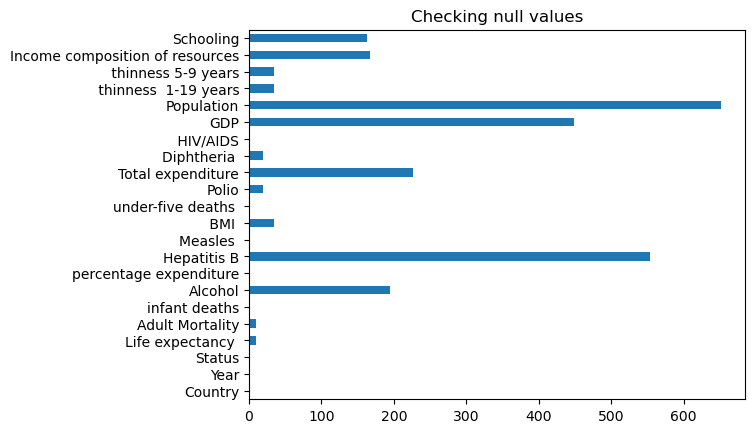

In [8]:
df.isnull().sum().plot(kind='barh')
plt.title('Checking null values')
plt.show()

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# Segregate Categorical and Numerical Columns

numerical_col = df.select_dtypes(include = ['int64','float64'])
categorical_col = df.select_dtypes(include = 'object')

In [11]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [12]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

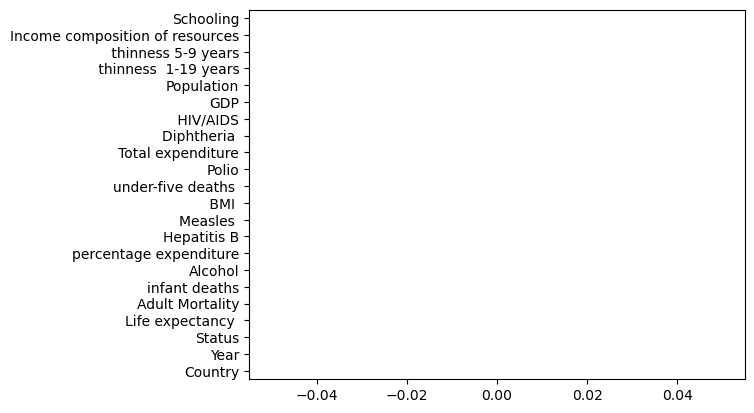

In [13]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [14]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [16]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003.0,1,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001.0,1,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [17]:
X = df.drop(columns = ['Country','Life expectancy '],axis = 1)
y = df['Life expectancy ']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from xgboost import XGBRegressor
XGB = XGBRegressor().fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print(XGB.score(X_train, y_train))

0.9993715891066265


In [21]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Regressor:',r2_score(y_test,y_pred_ada)*100)

Model Accuracy for ADABoost Regressor: 89.98994845573061


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print("MOdel accuracy for the GradientBoostRegressor",r2_score(y_test,y_pred_gb)*100)

MOdel accuracy for the GradientBoostRegressor 94.95953378623572


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Regressor: ',r2_score(y_test,y_pred_RF)*100)

The Model Accuracy for the Random Forest Regressor:  96.23824489935659


In [25]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score

Rs = RANSACRegressor().fit(X_train,y_train)
y_pred_Rs = Rs.predict(X_test)

print('The Model Accuracy for the RANSAC Regressor: ',r2_score(y_test,y_pred_Rs)*100)

The Model Accuracy for the RANSAC Regressor:  16.933866632647277


In [28]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

huber = HuberRegressor().fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)
print("The accuracy for the huber is",r2_score(y_test,y_pred_huber)*100)


The accuracy for the huber is 80.24206061146427
